#### Загрузим данные и посмотрим на них

In [21]:
import warnings
import matplotlib.pyplot as plt

from pandas import DataFrame

warnings.filterwarnings("ignore")

!pip install pandas -q

import pandas as pd
# Хак чтобы работало на Anaconda под MacOs 10.15.7 Catalina
pd.DataFrame.iteritems = pd.DataFrame.items

In [22]:
!pip install plotly -q

import plotly.graph_objects as go

def linear_plot(df, title):
    fig = go.Figure([go.Scatter(x=df['date'], y=df['close'], mode='lines')])
    fig.update_layout(plot_bgcolor='white',
                      xaxis_title='Date',
                      yaxis_title='Price',
                      title=title)
    fig.show()

def candlestick_plot(df, title):
    fig = go.Figure([go.Candlestick(x=df['date'],
                                open=df['open'],
                                high=df['high'],
                                low=df['low'],
                                close=df['close'])])
    fig.update_layout(xaxis_rangeslider_visible=False,
                      plot_bgcolor='white',
                      xaxis_title='Date',
                      yaxis_title='Price',
                      title=title)
    fig.update_yaxes(fixedrange=False)
    fig.show()

In [27]:
!pip install ccxt -q

import ccxt
import time

exchange = ccxt.binance()
symbol = 'ETH/USDT'
timeframe = '1h'
since = exchange.parse8601('2024-01-01T00:00:00Z')
all_ohlcvs = []

while True:
    try:
        ohlcvs = exchange.fetch_ohlcv(symbol, timeframe, since)
        all_ohlcvs += ohlcvs
        if len(ohlcvs):
            print('Fetched', len(ohlcvs), symbol, timeframe, 'candles from', exchange.iso8601(ohlcvs[0][0]))
            since = ohlcvs[-1][0] + 1
            sleep_interval = exchange.rateLimit / 1000
            print('Sleep for', sleep_interval)
            time.sleep(sleep_interval)
        else:
            break
    except Exception as e:
        print(type(e).__name__, str(e))
print('Fetched', len(all_ohlcvs), symbol, timeframe, 'candles in total')

Fetched 500 ETH/USDT 1h candles from 2024-01-01T00:00:00.000Z
Sleep for 0.05
Fetched 500 ETH/USDT 1h candles from 2024-01-21T20:00:00.000Z
Sleep for 0.05
Fetched 500 ETH/USDT 1h candles from 2024-02-11T16:00:00.000Z
Sleep for 0.05
Fetched 500 ETH/USDT 1h candles from 2024-03-03T12:00:00.000Z
Sleep for 0.05
Fetched 500 ETH/USDT 1h candles from 2024-03-24T08:00:00.000Z
Sleep for 0.05
Fetched 500 ETH/USDT 1h candles from 2024-04-14T04:00:00.000Z
Sleep for 0.05
Fetched 500 ETH/USDT 1h candles from 2024-05-05T00:00:00.000Z
Sleep for 0.05
Fetched 500 ETH/USDT 1h candles from 2024-05-25T20:00:00.000Z
Sleep for 0.05
Fetched 500 ETH/USDT 1h candles from 2024-06-15T16:00:00.000Z
Sleep for 0.05
Fetched 500 ETH/USDT 1h candles from 2024-07-06T12:00:00.000Z
Sleep for 0.05
Fetched 500 ETH/USDT 1h candles from 2024-07-27T08:00:00.000Z
Sleep for 0.05
Fetched 500 ETH/USDT 1h candles from 2024-08-17T04:00:00.000Z
Sleep for 0.05
Fetched 500 ETH/USDT 1h candles from 2024-09-07T00:00:00.000Z
Sleep for 0.05

In [28]:
df = pd.DataFrame(all_ohlcvs)
df.columns = ['date','open','high','low','close','volume']
df = df.sort_values(by='date')
df = df.drop_duplicates(subset='date').reset_index(drop=True)
df['date'] = pd.to_datetime(df['date'], unit='ms')
df.to_csv('ETH_USDT_1h.csv', index=False)
df

,date,open,high,low,close,volume
0,2024-01-01 00:00:00,2281.87,2297.18,2281.27,2295.51,10771.9183
1,2024-01-01 01:00:00,2295.52,2306.60,2292.90,2303.72,8413.4260
2,2024-01-01 02:00:00,2303.72,2304.72,2291.20,2293.02,5808.2533
3,2024-01-01 03:00:00,2293.03,2294.50,2271.00,2273.81,10745.7360
4,2024-01-01 04:00:00,2273.80,2279.86,2265.24,2279.55,9681.5762
...,...,...,...,...,...,...
8981,2025-01-09 05:00:00,3340.30,3343.36,3325.06,3328.87,8953.9185
8982,2025-01-09 06:00:00,3328.86,3334.99,3315.26,3316.21,9212.1338
8983,2025-01-09 07:00:00,3316.21,3324.43,3281.96,3288.71,21420.9516
8984,2025-01-09 08:00:00,3288.71,3327.20,3265.77,3309.91,28998.0043


In [29]:
linear_plot(df, 'ETH/USDT')

In [30]:
df = pd.read_csv('ETH_USDT_1h.csv')
df = df.sort_values(by='date')
df = df.drop_duplicates(subset='date').reset_index(drop=True)
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df

,open,high,low,close,volume
date,,,,,
2024-01-01 00:00:00,2281.87,2297.18,2281.27,2295.51,10771.9183
2024-01-01 01:00:00,2295.52,2306.60,2292.90,2303.72,8413.4260
2024-01-01 02:00:00,2303.72,2304.72,2291.20,2293.02,5808.2533
2024-01-01 03:00:00,2293.03,2294.50,2271.00,2273.81,10745.7360
2024-01-01 04:00:00,2273.80,2279.86,2265.24,2279.55,9681.5762
...,...,...,...,...,...
2025-01-09 05:00:00,3340.30,3343.36,3325.06,3328.87,8953.9185
2025-01-09 06:00:00,3328.86,3334.99,3315.26,3316.21,9212.1338
2025-01-09 07:00:00,3316.21,3324.43,3281.96,3288.71,21420.9516


In [31]:
df.shape

(8986, 5)

In [32]:
df.isnull().sum()

open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [33]:
df.describe()

,open,high,low,close,volume
count,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000
mean,3054.541471,3068.276729,3039.666715,3054.655811,16839.867382
std,509.302984,511.884083,506.345479,509.245256,17840.921145
min,2169.960000,2194.920000,2100.000000,2169.960000,62.606200
25%,2570.020000,2582.060000,2557.237500,2570.087500,7114.248350
50%,3102.890000,3116.555000,3086.310000,3102.960000,11713.143200
75%,3472.197500,3488.962500,3454.985000,3472.207500,20017.034100
max,4086.660000,4107.800000,4062.600000,4086.660000,463263.532900


In [34]:
# Удалим значения где нет объемов
df = df.drop(df[df['volume']==0.0].index)

#### Подключим библиотеки PyTorch

In [35]:
!pip install torch -q

In [36]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

#### Разобьем данные на обучающую и тестовую выборки

In [41]:
data = df.copy()
window_size = 30
data

,open,high,low,close,volume
date,,,,,
2024-01-01 00:00:00,2281.87,2297.18,2281.27,2295.51,10771.9183
2024-01-01 01:00:00,2295.52,2306.60,2292.90,2303.72,8413.4260
2024-01-01 02:00:00,2303.72,2304.72,2291.20,2293.02,5808.2533
2024-01-01 03:00:00,2293.03,2294.50,2271.00,2273.81,10745.7360
2024-01-01 04:00:00,2273.80,2279.86,2265.24,2279.55,9681.5762
...,...,...,...,...,...
2025-01-09 05:00:00,3340.30,3343.36,3325.06,3328.87,8953.9185
2025-01-09 06:00:00,3328.86,3334.99,3315.26,3316.21,9212.1338
2025-01-09 07:00:00,3316.21,3324.43,3281.96,3288.71,21420.9516


In [42]:
def get_data_loader(data):
    X, y = [], []
    for i in range(len(data) - window_size - 1):
        X.append(data.iloc[i:i + window_size].values)

        if data['close'].iloc[i + window_size] > data['close'].iloc[i + window_size - 1]:
            y.append(2)  # Buy
        elif data['close'].iloc[i + window_size] < data['close'].iloc[i + window_size - 1]:
            y.append(0)  # Sell
        else:
            y.append(1)  # Hold

    X = torch.tensor(X, dtype=torch.float32)
    y = torch.tensor(y, dtype=torch.long)

    dataset = TensorDataset(X, y)
    return DataLoader(dataset, batch_size=32, shuffle=False)

In [43]:
# Определяем дату начала тестовой выборки
test_start_date = data.index.max() - pd.DateOffset(months=3)

# Разделение данных на тренировочную и тестовую выборки по времени
train_data = data[data.index < test_start_date]
test_data = data[data.index >= test_start_date]

print(f"Train size: {len(train_data)}, Test size: {len(test_data)}")

loader_train = get_data_loader(train_data)
loader_test = get_data_loader(test_data)

Train size: 6777, Test size: 2209


Напишем метод обучения модели и расчета метрик качества

In [84]:
!pip install torcheval-nightly -q
!pip install scikit-image -q

from torcheval.metrics import MulticlassAccuracy, MulticlassPrecision, MulticlassRecall, MulticlassF1Score

def train_model(model, dataloader, num_epochs=10):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    accuracy = MulticlassAccuracy()
    precision = MulticlassPrecision(num_classes=3)
    recall = MulticlassRecall(num_classes=3)
    f1_score = MulticlassF1Score(num_classes=3)

    all_metrics = []

    for epoch in range(num_epochs):
        for inputs, labels in dataloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            
            accuracy.update(outputs, labels)
            precision.update(outputs, labels)
            recall.update(outputs, labels)
            f1_score.update(outputs, labels)
            
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
        print(f"Epoch [{epoch+1}/{num_epochs}]")
        metrics = {
            'Loss': loss.item(),
            'Precision': precision.compute().item(),
            'Recall': recall.compute().item(),
            'Accuracy': accuracy.compute().item(),
            'F1-Score': f1_score.compute().item()
        }
        print("Metrics")
        print(metrics)
        all_metrics.append(metrics)
        
        #reset metrics
        precision.reset()
        recall.reset()
        accuracy.reset()
        f1_score.reset()
        
    metrics_df = pd.DataFrame(all_metrics)
    
    fig = go.Figure([go.Scatter(x=metrics_df.index, y=metrics_df['Loss'], mode='lines')])
    fig.update_layout(plot_bgcolor='white',
                      xaxis_title='Epoch',
                      yaxis_title='Loss',
                      title="Loss/Epoch")
    fig.show()
    
    fig = go.Figure([go.Scatter(x=metrics_df.index, y=metrics_df['Accuracy'], mode='lines')])
    fig.update_layout(plot_bgcolor='white',
                      xaxis_title='Epoch',
                      yaxis_title='Accuracy',
                      title="Accuracy/Epoch")
    fig.show()

#### CNN модель

In [46]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv1d(5, 16, kernel_size=3)  # Input: 5 channels, Output: 16 channels
        self.conv2 = nn.Conv1d(16, 32, kernel_size=3)  # Input: 16 channels, Output: 32 channels
        self.fc1 = nn.Linear(32 * (window_size - 4), 64)  # Flattened size after conv
        self.fc2 = nn.Linear(64, 3)  # Output: 3 classes (Buy, Hold, Sell)

    def forward(self, x):
        x = x.permute(0, 2, 1)  # Permute to (batch_size, channels, sequence_length) -> [32, 5, 30]
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = x.view(x.size(0), -1)  # Flatten the output from convolution layers
        x = torch.relu(self.fc1(x))
        return self.fc2(x)  # Return logits (raw output) for each class

Обучим модель

In [85]:
cnn = CNN()  # Replace with StockLSTM(), StockGRU(), etc.
train_model(cnn, loader_train)

Epoch [1/10]
Metrics
{'Loss': 1.2007920742034912, 'Precision': 0.4906611442565918, 'Recall': 0.4906611442565918, 'Accuracy': 0.4906611442565918, 'F1-Score': 0.4906611442565918}
Epoch [2/10]
Metrics
{'Loss': 0.9114059805870056, 'Precision': 0.5083011984825134, 'Recall': 0.5083011984825134, 'Accuracy': 0.5083011984825134, 'F1-Score': 0.5083011984825134}
Epoch [3/10]
Metrics
{'Loss': 0.7430322170257568, 'Precision': 0.5100800395011902, 'Recall': 0.5100800395011902, 'Accuracy': 0.5100800395011902, 'F1-Score': 0.5100800395011902}
Epoch [4/10]
Metrics
{'Loss': 0.7150999903678894, 'Precision': 0.5277201533317566, 'Recall': 0.5277201533317566, 'Accuracy': 0.5277201533317566, 'F1-Score': 0.5277201533317566}
Epoch [5/10]
Metrics
{'Loss': 0.7046880125999451, 'Precision': 0.5406166911125183, 'Recall': 0.5406166911125183, 'Accuracy': 0.5406166911125183, 'F1-Score': 0.5406166911125183}
Epoch [6/10]
Metrics
{'Loss': 0.6819658875465393, 'Precision': 0.5512896776199341, 'Recall': 0.5512896776199341, 'A

Посмотрим на предсказания на тестовых данных

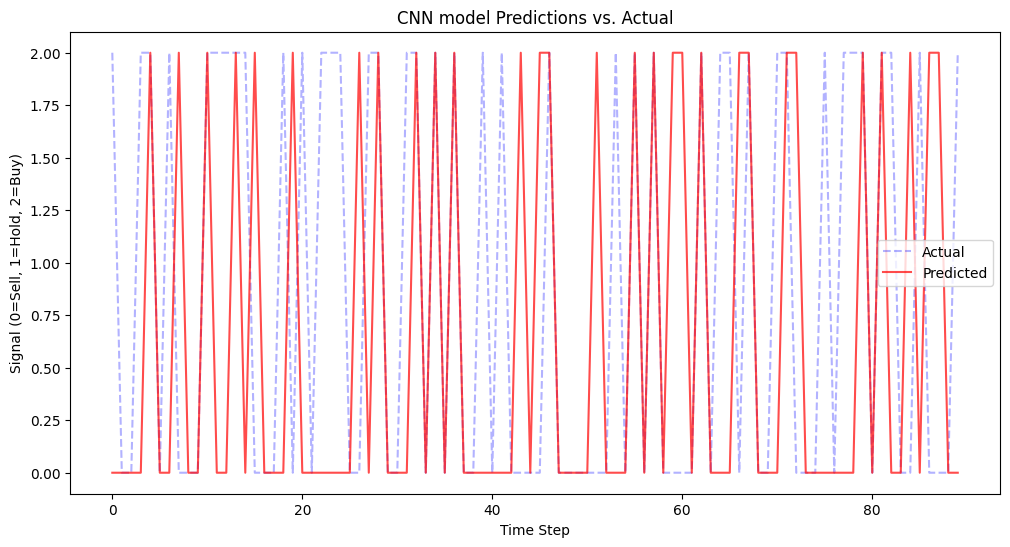

In [86]:
title="CNN model Predictions vs. Actual"
cnn.eval()
all_predictions = []
all_targets = []
with torch.no_grad():
    for inputs, targets in loader_test:
        outputs = cnn(inputs)
        _, predicted = torch.max(outputs, 1)
        all_predictions.extend(predicted.numpy())
        all_targets.extend(targets.numpy())

# Plot actual vs predicted labels
plt.figure(figsize=(12, 6))
plt.plot(all_targets[-90:], label='Actual', color='blue', linestyle='--', alpha=0.3)
plt.plot(all_predictions[-90:], label='Predicted', color='red', alpha=0.7)
plt.title(title)
plt.xlabel("Time Step")
plt.ylabel("Signal (0=Sell, 1=Hold, 2=Buy)")
plt.legend()
plt.show()

Получили неплохие результаты, попробуем применить модель в торговой стратегии